In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# **Getting Started** 

**Title : BMI level Prediction**
  
  **BMI level Status :**

  0 - Extremely Weak
  1 - Weak
  2 - Normal
  3 - Overweight
  4 - Obesity
  5 - Extreme Obesity


### **DataFraming**

**Read .csv file into pandas**

In [25]:
data = pd.read_csv(r'D:\Flask Project\Metabolism Project\BMI\bmi.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


## **Exploratory data analysis**

In [26]:
#Shape of data 
print(data.shape)
#dtypes of data 
print(data.dtypes)

(500, 4)
Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object


In [27]:
# Info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [28]:
# Checking for null values
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

### **Checking Duplicates**

In [29]:
data.duplicated().sum()

11

### **Dropping Duplicates**

In [30]:
data = data.drop_duplicates()

# **Transformation**

In [31]:
# label encoding
data.replace({"Gender":{'Male':1,'Female':0}},inplace=True)
# printing the first 5 rows of the dataframe
data.head(5)

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [32]:
# Value_counts of index
data['Index'].value_counts()

Index
5    195
4    128
2     69
3     64
1     20
0     13
Name: count, dtype: int64

# Data Visualization

In [41]:
#!pip install seaborn

<Axes: xlabel='Index', ylabel='count'>

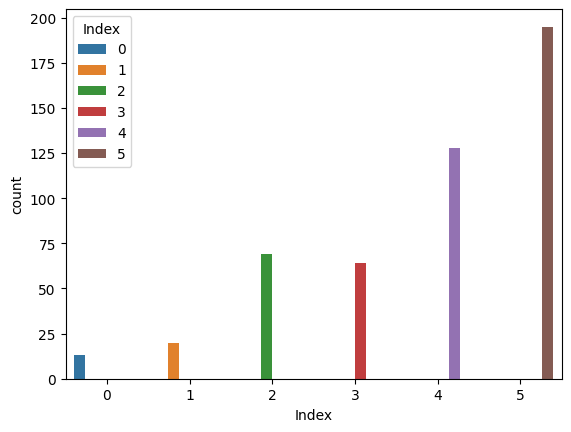

In [42]:
# Index & Index Count
import seaborn as sns
sns.countplot(x='Index',hue='Index',data=data)

<Axes: xlabel='Gender', ylabel='count'>

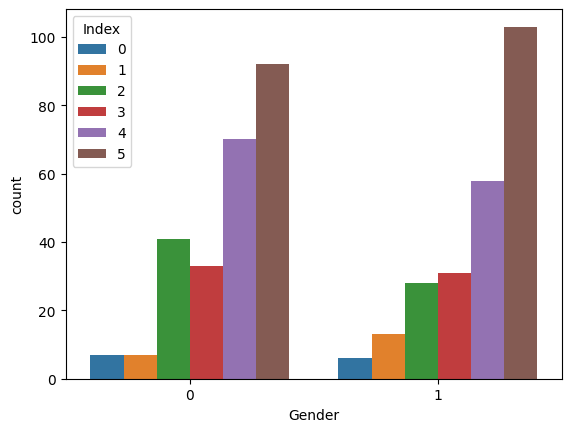

In [43]:
# Gender & Index
import seaborn as sns
sns.countplot(x='Gender',hue='Index',data=data)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16852\370700729.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16852\370700729.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_168

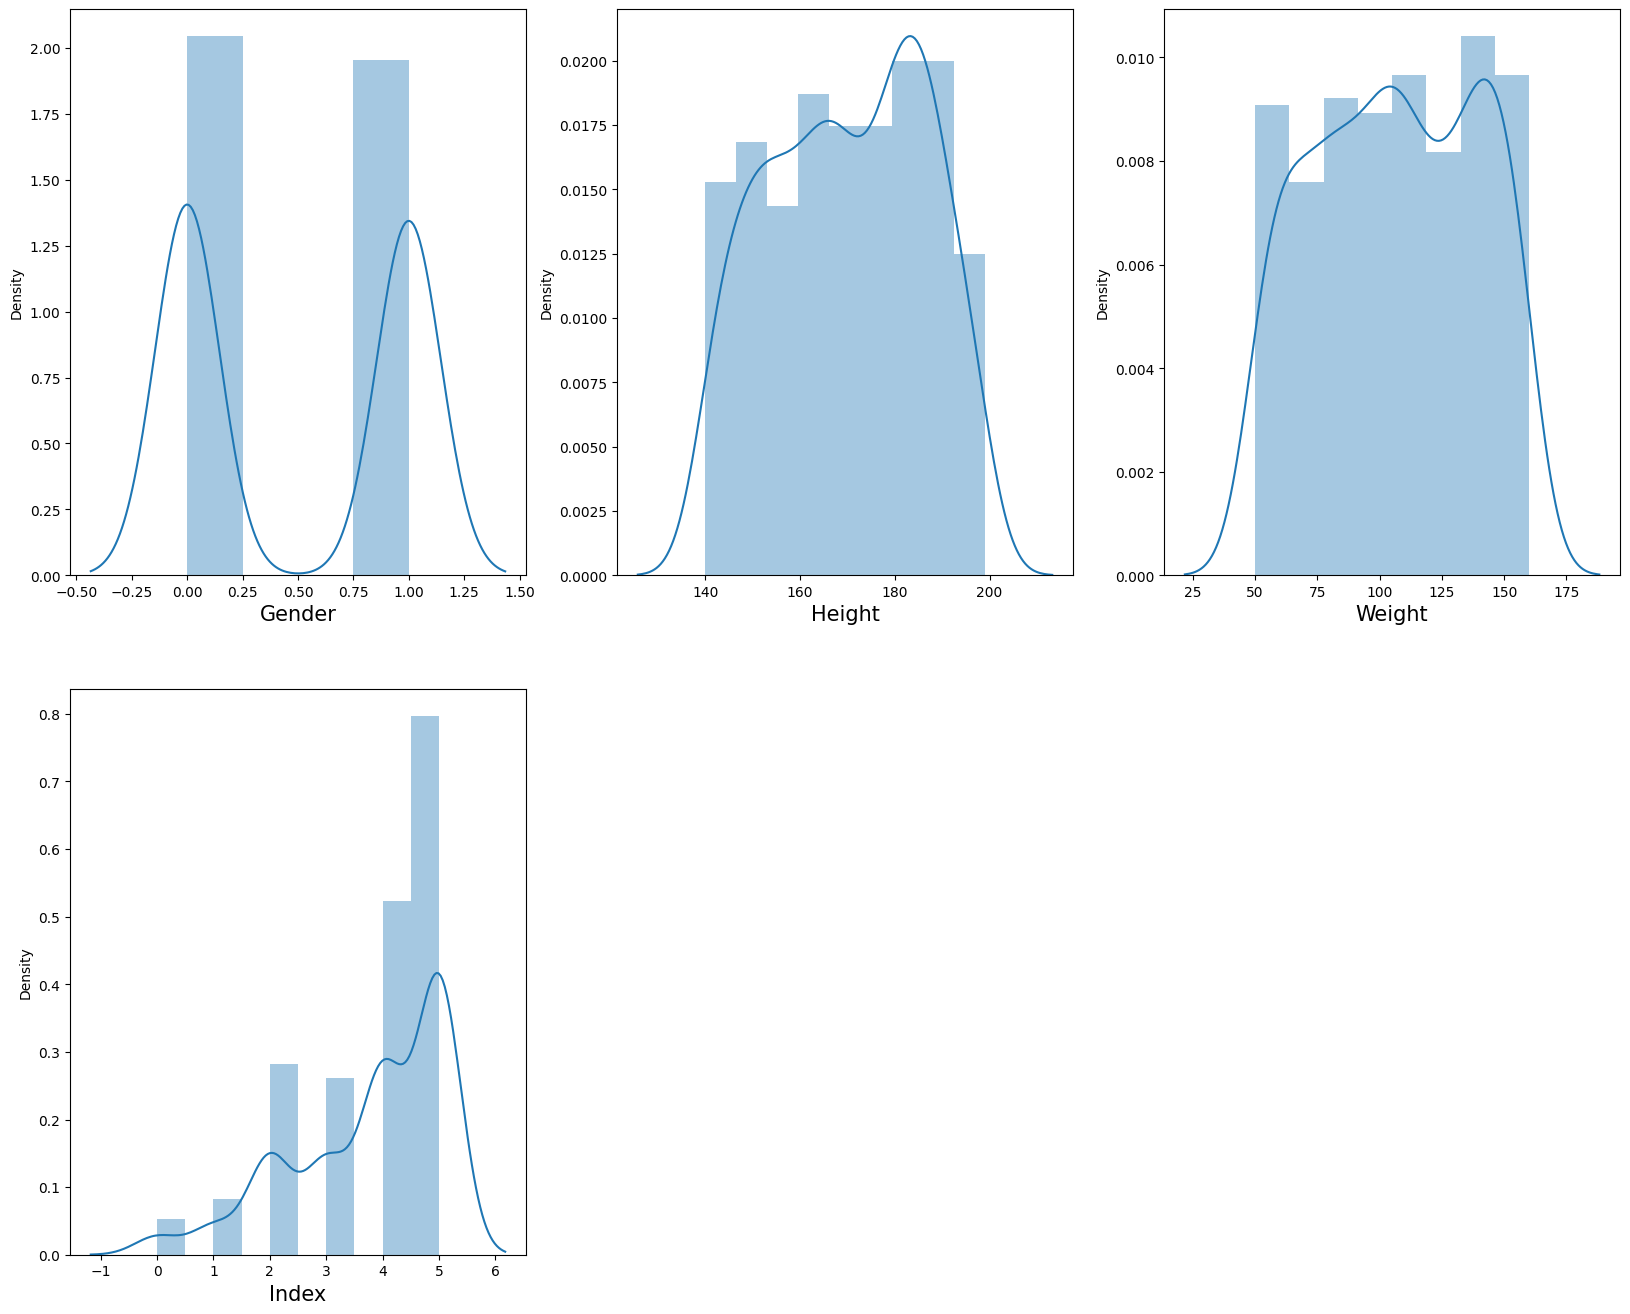

In [44]:
# let's see how data is distributed for every column
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 25))
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

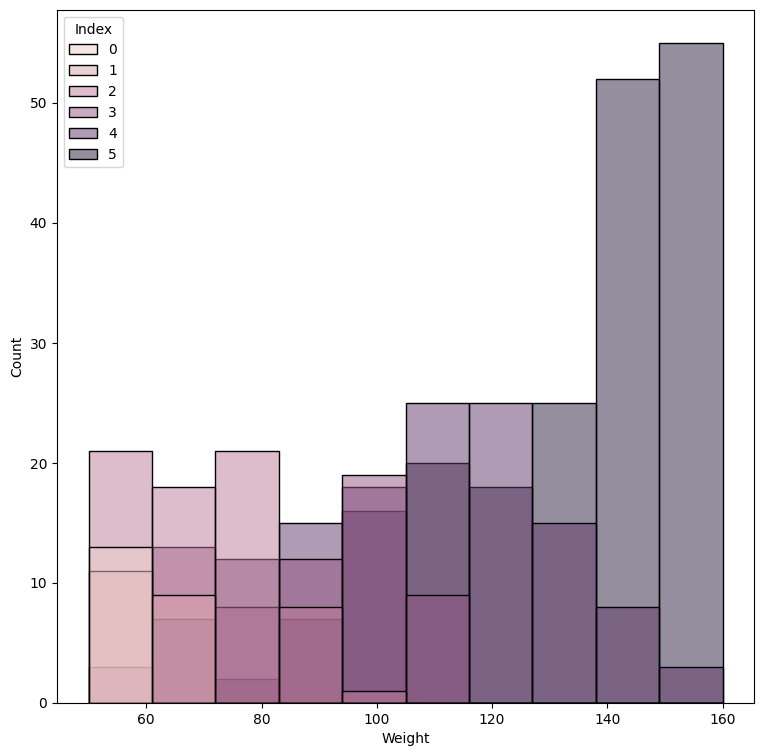

In [45]:
plt.figure(figsize=(9,9))
sns.histplot(data[['Weight', 'Index']], x = "Weight", hue="Index")
plt.title("")
plt.show()

**We can see that the distribution of data is normal ! lets move for the Model preparation.** 🚀

### Find Correlations in Data Set

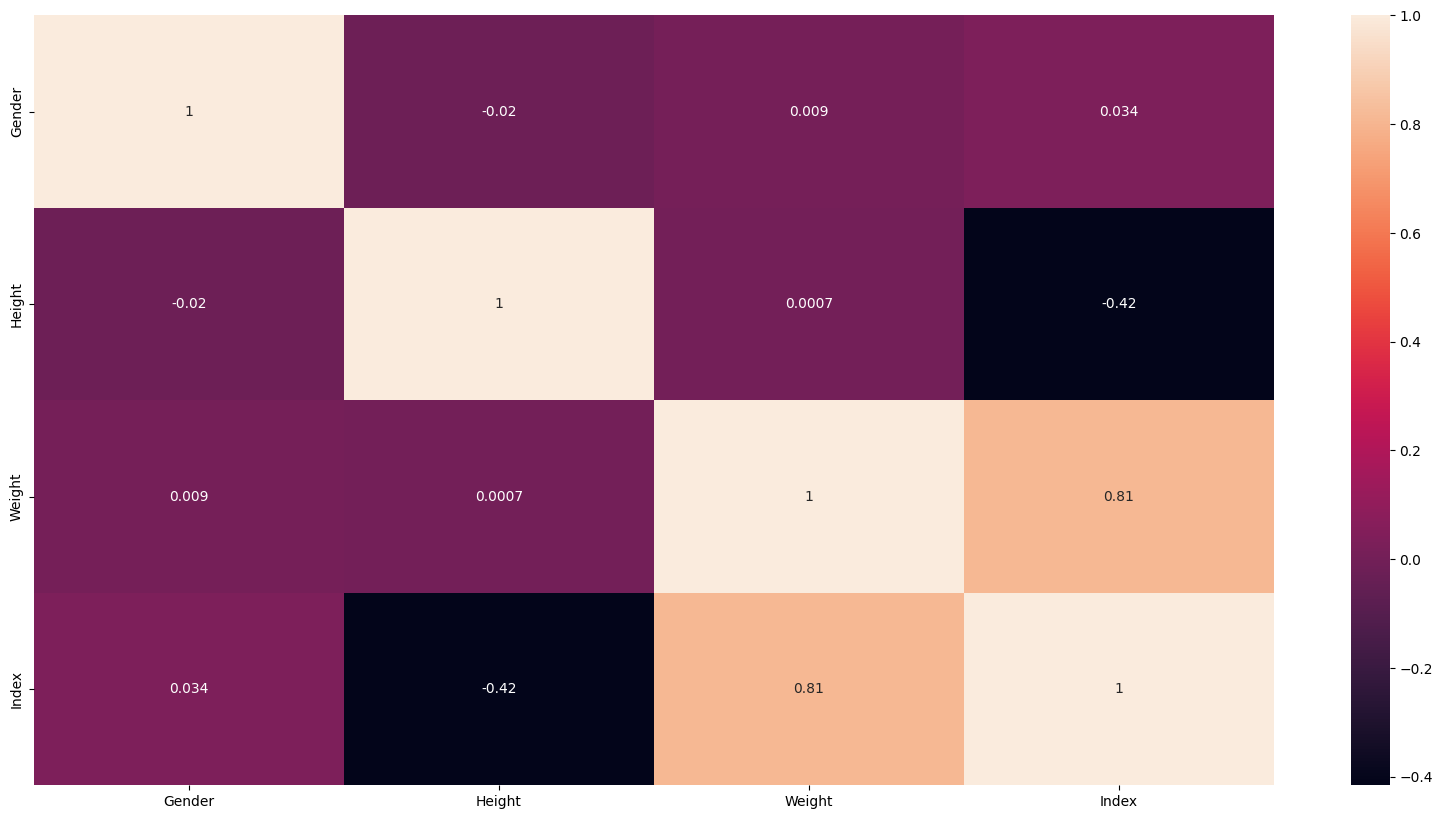

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True);
plt.show()

# **Model Preparation**

Spilt into X & Y

In [47]:
# separating the data and target
X = data.drop(columns=['Index'],axis=1)
y = data['Index']

In [48]:
print("The shape of X is " , X.shape)
print("The shape of Y is " , y.shape)

The shape of X is  (489, 3)
The shape of Y is  (489,)


In [50]:
from sklearn.model_selection import train_test_split
# separating into train and testing
X_train, X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print("Shape of X_train is " ,X_train.shape)
print("Shape of X_test  is " ,X_test.shape)
print("Shape of Y_train is " ,Y_train.shape)
print("Shape of Y_test  is " ,Y_test.shape)

Shape of X_train is  (391, 3)
Shape of X_test  is  (98, 3)
Shape of Y_train is  (391,)
Shape of Y_test  is  (98,)


In [51]:
# After statify Y train & test values
print(Y_train.value_counts())
print(Y_test.value_counts())

Index
5    156
4    102
2     55
3     51
1     16
0     11
Name: count, dtype: int64
Index
5    39
4    26
2    14
3    13
1     4
0     2
Name: count, dtype: int64


# **Feature Scalilng**

In [52]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
X_train

array([[ 0.99744572,  0.34561137,  0.06005576],
       [-1.00256082, -0.88905328, -0.03227112],
       [ 0.99744572,  0.28387814,  0.86022209],
       ...,
       [ 0.99744572,  0.34561137, -0.61700805],
       [-1.00256082,  0.03694521,  1.38340776],
       [ 0.99744572,  0.90121046,  0.9833246 ]])

In [54]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier(n_estimators=100)
randf.fit(X_train,Y_train)
y_pred=randf.predict(X_test)

In [55]:
randf.feature_importances_

array([0.01277507, 0.34211661, 0.64510832])

In [56]:
features = data.columns.values.tolist()[0:3] #Dropping Dependent Variable BMI
feature_pro = pd.Series(randf.feature_importances_,index=features).sort_values(ascending=False)

In [57]:
feature_pro 

Weight    0.645108
Height    0.342117
Gender    0.012775
dtype: float64

## Feature Importances Vizualizing

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


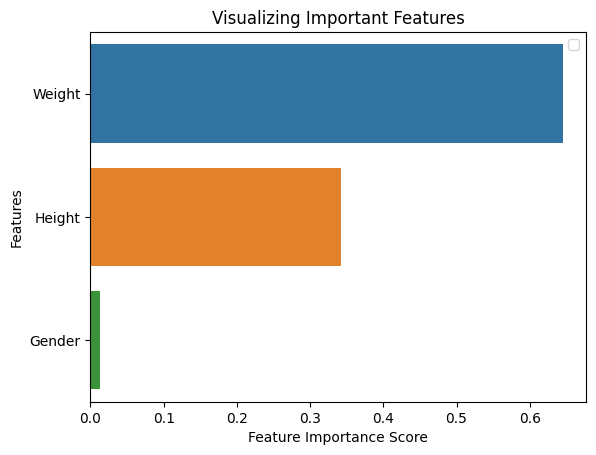

In [58]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_pro, y=feature_pro.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# **Model Training**

**We will train different model after the evaluation of model we will select out best model for production.**

1.   Logistic Regression
2.   KNN
3.   SVC
3.   Decision Tree
4.   Random Forest Regressor
5.   XgBoost
6.   Gradient Boosting


## **Logistic Regression**

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(Y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.8363171355498721
Test Accuracy of Logistic Regression Model is 0.8367346938775511


In [60]:
# confusion matrix 
confusion_matrix(Y_test, y_pred)

array([[ 0,  1,  1,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  4,  5,  4,  0],
       [ 0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  2, 37]], dtype=int64)

In [61]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         4
           2       0.61      1.00      0.76        14
           3       1.00      0.38      0.56        13
           4       0.81      1.00      0.90        26
           5       1.00      0.95      0.97        39

    accuracy                           0.84        98
   macro avg       0.57      0.56      0.53        98
weighted avg       0.83      0.84      0.81        98



C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## **SVC**


In [62]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(Y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.8976982097186701
Test Accuracy of SVC Model is 0.8673469387755102


In [63]:
# confusion matrix
confusion_matrix(Y_test, y_pred)

array([[ 1,  1,  0,  0,  0,  0],
       [ 1,  1,  2,  0,  0,  0],
       [ 0,  0, 13,  1,  0,  0],
       [ 0,  0,  4,  8,  1,  0],
       [ 0,  0,  0,  0, 25,  1],
       [ 0,  0,  0,  0,  2, 37]], dtype=int64)

In [64]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.25      0.33         4
           2       0.68      0.93      0.79        14
           3       0.89      0.62      0.73        13
           4       0.89      0.96      0.93        26
           5       0.97      0.95      0.96        39

    accuracy                           0.87        98
   macro avg       0.74      0.70      0.71        98
weighted avg       0.87      0.87      0.86        98



## **DecisionTreeClassifier**

In [65]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.8469387755102041


In [66]:
# confusion matrix
confusion_matrix(Y_test, y_pred)

array([[ 2,  0,  0,  0,  0,  0],
       [ 1,  3,  0,  0,  0,  0],
       [ 1,  2, 10,  1,  0,  0],
       [ 0,  0,  2,  7,  4,  0],
       [ 0,  0,  0,  0, 23,  3],
       [ 0,  0,  0,  0,  1, 38]], dtype=int64)

In [67]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.60      0.75      0.67         4
           2       0.83      0.71      0.77        14
           3       0.88      0.54      0.67        13
           4       0.82      0.88      0.85        26
           5       0.93      0.97      0.95        39

    accuracy                           0.85        98
   macro avg       0.76      0.81      0.76        98
weighted avg       0.86      0.85      0.84        98



## **Hyper parameter tuning**

In [68]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],

    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [69]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.8287568971113275


In [70]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)
dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decesion Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 0.9641943734015346
Test Accuracy of Decesion Tree Model is 0.8367346938775511


**Visualization the DTC tree.**

[Text(0.5253623188405797, 0.95, 'x[2] <= -0.725\nentropy = 2.15\nsamples = 391\nvalue = [11, 16, 55, 51, 102, 156]'),
 Text(0.27717391304347827, 0.85, 'x[1] <= -0.21\nentropy = 2.135\nsamples = 112\nvalue = [11, 16, 50, 18, 16, 1]'),
 Text(0.14130434782608695, 0.75, 'x[2] <= -1.294\nentropy = 1.79\nsamples = 51\nvalue = [1, 0, 19, 14, 16, 1]'),
 Text(0.07246376811594203, 0.65, 'x[1] <= -1.136\nentropy = 0.998\nsamples = 23\nvalue = [1, 0, 17, 5, 0, 0]'),
 Text(0.043478260869565216, 0.55, 'x[2] <= -1.525\nentropy = 0.954\nsamples = 8\nvalue = [0, 0, 3, 5, 0, 0]'),
 Text(0.028985507246376812, 0.45, 'x[2] <= -1.663\nentropy = 0.811\nsamples = 4\nvalue = [0, 0, 3, 1, 0, 0]'),
 Text(0.014492753623188406, 0.35, 'entropy = 1.0\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]'),
 Text(0.043478260869565216, 0.35, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.057971014492753624, 0.45, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.10144927536231885, 0.55, 'x[1] <

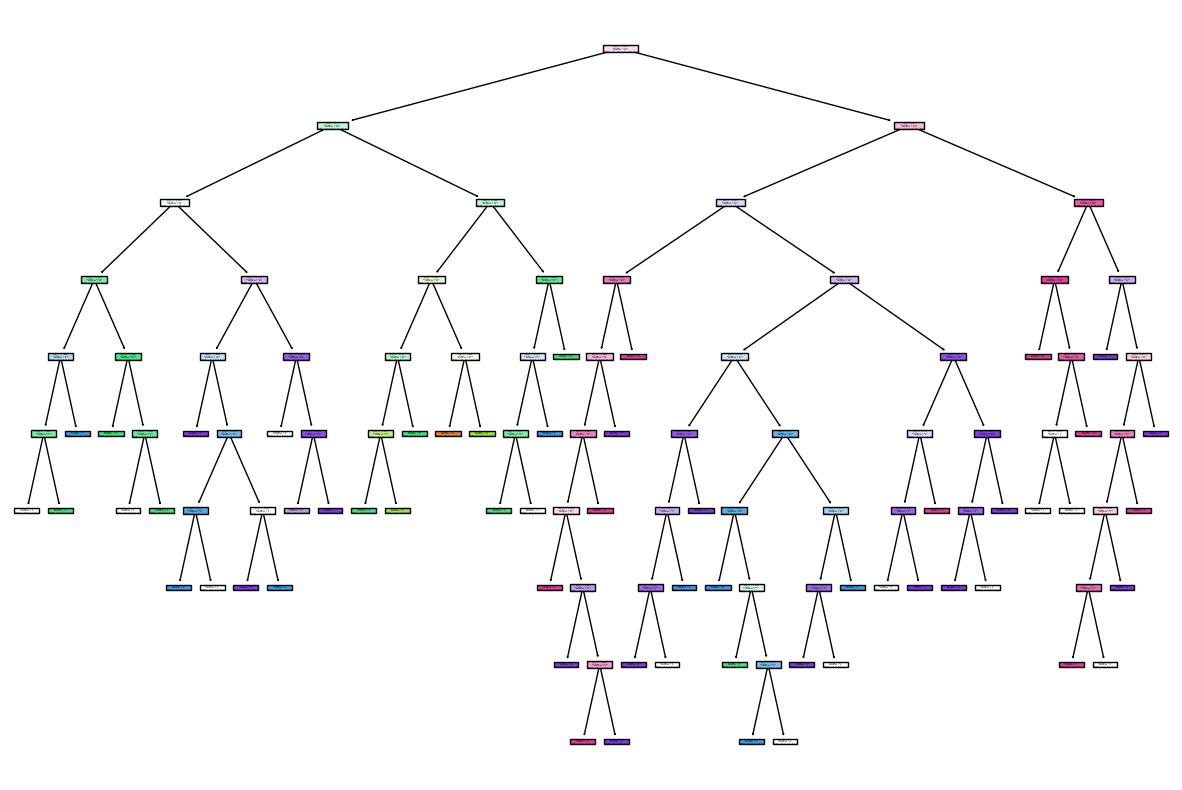

In [71]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

In [72]:
data.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

## **Random Forest Classifier**

In [73]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rand_clf.fit(X_train, Y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(Y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.7033248081841432
Test Accuracy of Random Forest Model is 0.6836734693877551


## **KNN**

In [74]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier(n_neighbors=16)
kfitModel = k_model.fit(X_train, Y_train)

# accuracy score on training data

kX_train_prediction = kfitModel.predict(X_train)
training_data_accuray = accuracy_score(kX_train_prediction,Y_train)
print('Accuracy on training data  : ', training_data_accuray)

# accuracy score on testing data
kX_test_prediction = kfitModel.predict(X_test)
kx_lgr_test_data_accuray = accuracy_score(kX_test_prediction,Y_test)
print('Accuracy on test data      : ', kx_lgr_test_data_accuray)

Accuracy on training data  :  0.8593350383631714
Accuracy on test data      :  0.8163265306122449


## **XGB Classifier**

In [78]:
!pip install xgboost

  Using cached xgboost-1.7.6-py3-none-win_amd64.whl (70.9 MB)



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, n_estimators = 10)
xgb.fit(X_train, Y_train)

y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(Y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of XGB Model is {xgb_train_acc}")
print(f"Test Accuracy of XGB Model is {xgb_test_acc}")

Training Accuracy of XGB Model is 0.7902813299232737
Test Accuracy of XGB Model is 0.8061224489795918


In [80]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'XgBoost']
scores = [lr_test_acc, kx_lgr_test_data_accuray, svc_test_acc, dtc_test_acc, rand_clf_test_acc, xgb_test_acc]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVC,0.867347
0,Logistic Regression,0.836735
3,Decision Tree,0.836735
1,KNN,0.816327
5,XgBoost,0.806122
4,Random Forest,0.683673


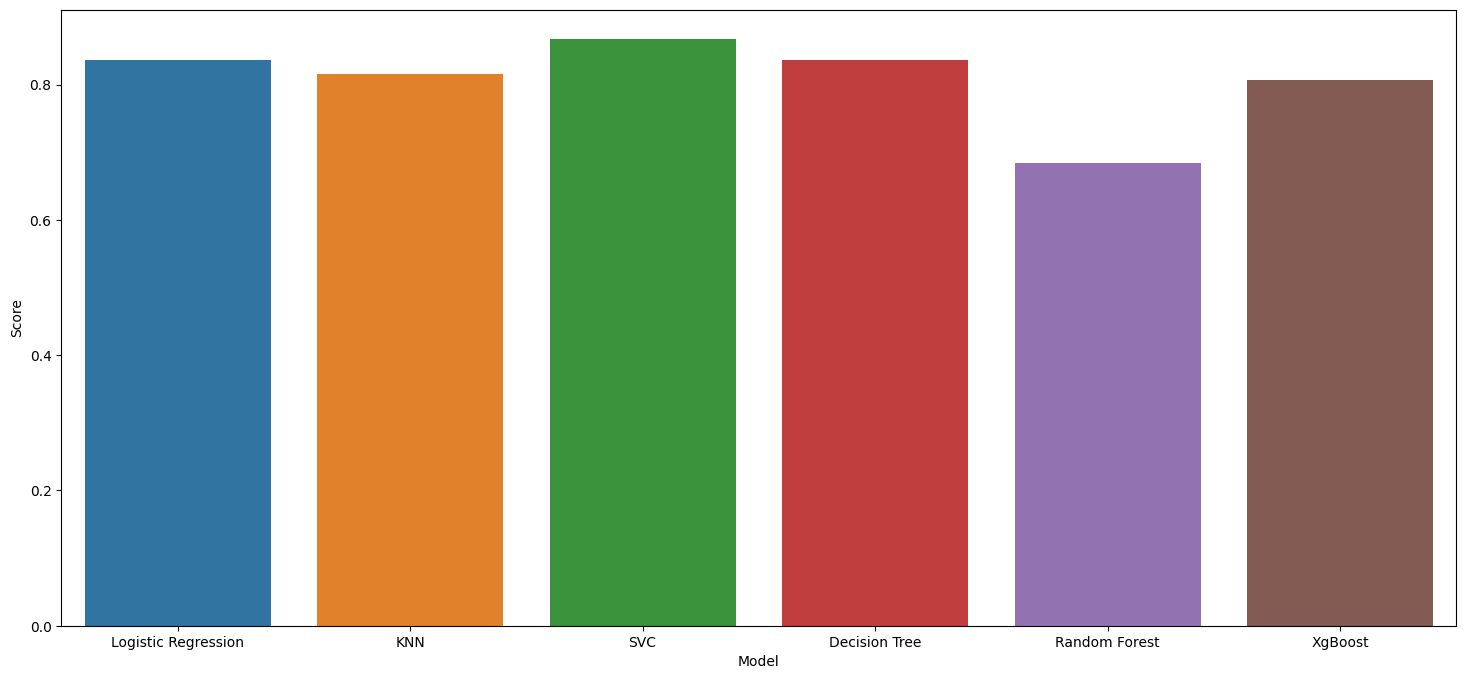

In [81]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

### ***SVC gives us the best result so we will save this model for production but it overfit.***

In [82]:
import pickle

In [83]:
# save the model to disk
filename = 'BMI_model.sav'
pickle.dump(models, open(filename, 'wb'))


In [84]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

,Model,Score
0,Logistic Regression,0.836735
1,KNN,0.816327
2,SVC,0.867347
3,Decision Tree,0.836735
4,Random Forest,0.683673
5,XgBoost,0.806122


## Create Pickle File for lr Model

In [87]:
import pickle
# open a file, where you ant to store the data
file = open('BMI_model.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)  #Selecting svm as the Model because of Giving highest Accuracy

In [88]:
#Reading the Pickle file for to certify model was imported Successfully
model = open('BMI_model.pkl','rb')
lrModel= pickle.load(model)

In [89]:
# Prediction Parameters testing using the imported Model
y_prediction = lrModel.predict(X_test)

In [90]:
svc_acc = accuracy_score(Y_test, y_prediction)

In [91]:
svc_acc

0.8367346938775511

## ***.hy file***

In [94]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

In [95]:
# Save the model to a .hy file
file = open('BMI_model.hy', 'wb')
joblib.dump(lr, file)
# file.close()

# Load the model from the .hy file
model = open('BMI_model.hy', 'rb')
loaded_model = joblib.load(model)
# model.close()

# Assuming X_test is your test data
predictions = loaded_model.predict(X_test)

In [96]:
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy of the loaded model is {accuracy}")

Accuracy of the loaded model is 0.8367346938775511


**So this will Verify that Our Imported hy file provides the desired out put for the Lung Cancer Dataset for Prdiction Purpose**

In [97]:
import numpy as np
import joblib


In [98]:
loaded_model = joblib.load('BMI_model.hy')

In [99]:
X_New = np.array([1, 191, 54])  # level 2
X_New = np.reshape(X_New, (1, -1))

In [100]:
y_New = loaded_model.predict(X_New)

In [101]:
print("y_New- ",y_New)

y_New-  [1]
